# Understanding Genetic Algorithms (GA) from Scratch

Idea --> Jhon Holland --> Best genes travel generation to generation

`Evolutionary Algorithm`

- Abstraction of Real Biological Evolution 
- Finding optimal or best solution from group of solutions
- Focus on optimization --> towards best solution
- Population & Individuals (Chromosoms)

- `PHENOTYPE`: Raw solution space, real world solution space, not have proper representation in written form.
- `GENOTYPE`: Required for Computation, Representation which our algo understand, fined input, encoded.

`Operators of GA`

- `Selection`, `Encoding`, `Crossover`, `Mutation`

`! Just like in MACHINE LEARNING --> Before training the model we have to encode the input attributes`

## 01. Flow Chart

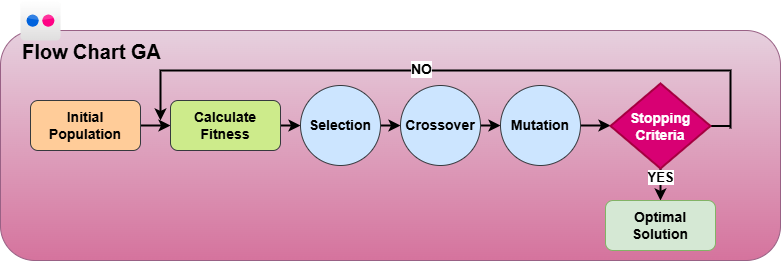

## 02. SGA (Simple Genetic Algorithm)

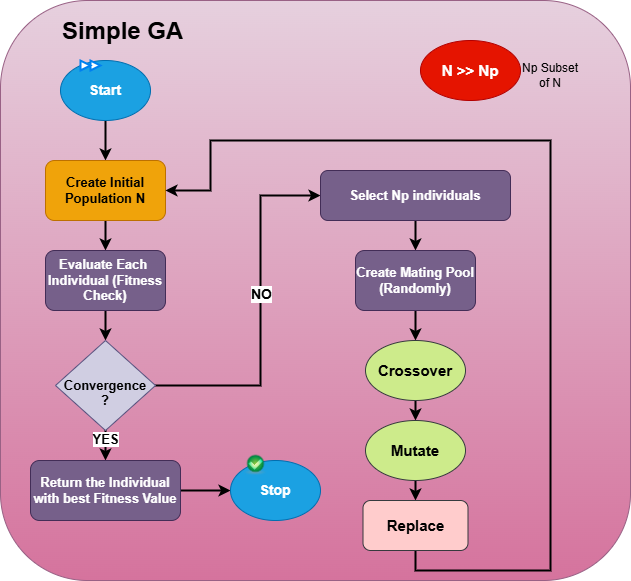

## 03. GA vs Traditional Algos

| Aspect                        | Genetic Algorithms                              | Traditional Algorithms                         |
|------------------------------|--------------------------------------------------|------------------------------------------------|
| **Problem Solving Approach** | Population-based, stochastic search             | Deterministic or rule-based                    |
| **Solution Representation**  | Chromosomes (strings, trees, etc.)              | Specific data structures (arrays, lists, etc.) |
| **Exploration Method**       | Evolutionary operators (selection, crossover, mutation) | Logical steps or iterative procedures   |
| **Best For**                 | Complex, nonlinear, poorly understood problems   | Well-defined, structured problems              |
| **Convergence**              | May find near-optimal or global solutions       | Often converges to exact solution (if exists)  |


## 04. Convergence Criteria /  Termination Condition

- `Manual Checking` --> Time Consuming, greater chance of mistake, mostly not used.
- `Solution Found that Satisfie Objective Criteria` --> there must be some criteria or threshold that must be satisfied.
- `Fixed number of generations` --> When we have sureity about increasing the generations will achieve the optimal solution. means after 50 or 60 generation we reach to optimal solution.
- `Budget Limit Reached` --> Storage, Time, Processing power, Resources.
- `After certain generations the solution equally fitter as the previous solution, showed linear behaiviour.`

## 05. Binary Encoding in GA

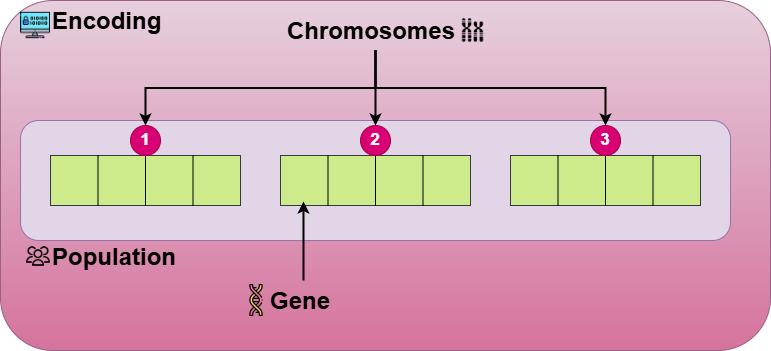

### i. Problem Definition
We want to maximize the function:
f(x) = x³, for x in [0, 255]

In Genetic Algorithm terms:
- `Solution (Chromosome)`: A number x in [0, 255]

- `Gene`: A single bit (binary digit)

- `Chromosome Length`: We need to represent numbers from 0 to 255 → requires 8 bits (2^8 = 256)

- `Population Size`: 10

- `Encoding Scheme`: Binary encoding

In [2]:
# Define the fitness function
def fitness_function(x):
    return x ** 3


In [3]:
# Step 1: Problem constraints
min_value = 0
max_value = 255
chromosome_length = 8  # Since 2^8 = 256, enough to represent values from 0 to 255


In [4]:
import random

# Step 2: Generate initial population
population_size = 10
population = [random.randint(min_value, max_value) for _ in range(population_size)]
population


[72, 26, 38, 208, 27, 127, 203, 153, 219, 60]

In [5]:
# Step 3: Binary encoding
def int_to_binary_chromosome(x, length=8):
    return format(x, f'0{length}b')


In [6]:
# Step 4: Display the population with binary and decimal values
print(f"{'Index':<6} {'Decimal':<8} {'Binary Chromosome':<20} {'Fitness (x^3)':<15}")
print('-' * 60)
for idx, individual in enumerate(population):
    binary = int_to_binary_chromosome(individual, chromosome_length)
    fitness = fitness_function(individual)
    print(f"{idx:<6} {individual:<8} {binary:<20} {fitness:<15}")

Index  Decimal  Binary Chromosome    Fitness (x^3)  
------------------------------------------------------------
0      72       01001000             373248         
1      26       00011010             17576          
2      38       00100110             54872          
3      208      11010000             8998912        
4      27       00011011             19683          
5      127      01111111             2048383        
6      203      11001011             8365427        
7      153      10011001             3581577        
8      219      11011011             10503459       
9      60       00111100             216000         


### ii. Problem Definition: Knapsack Problem

### Items Available:

| Item | Weight | Value |
|------|--------|-------|
| A    | 5      | 100    |
| B    | 10     | 150    |
| C    | 15     | 200    |

*(Here, we assume value = weight for simplicity, which is common in simple GA examples.)*

---

### Maximum Capacity of Knapsack:
**M = 25**

---

### Objective:
Maximize total value of selected items, **without exceeding 25 units of weight**.

---

### Chromosome Representation

**Binary Encoding:**

- Each item is represented by **1 bit**.
- Bit `1` → item is **included**
- Bit `0` → item is **not included**

**Chromosome Length = 3** (one bit for each item A, B, C)


In [10]:
import random

# Item definitions: (weight, value)
items = {
    'A': (5, 100),
    'B': (10, 150),
    'C': (15, 200)
}
max_capacity = 25
chromosome_length = len(items)
item_list = list(items.values())

In [11]:
# Step 1: Generate initial population
population_size = 4

def generate_chromosome():
    return [random.randint(0, 1) for _ in range(chromosome_length)]

population = [generate_chromosome() for _ in range(population_size)]
population

[[1, 0, 1], [1, 1, 0], [1, 1, 0], [0, 0, 1]]

In [12]:
generate_chromosome()

[1, 1, 0]

In [13]:
# Step 2: Fitness Function
def fitness_function(chromosome):
    total_weight = 0
    total_value = 0
    for gene, (weight, value) in zip(chromosome, item_list):
        if gene == 1:
            total_weight += weight
            total_value += value
    if total_weight > max_capacity:
        return 0  # Invalid solution
    else:
        return total_value

In [14]:
# Step 3: Display the population
print(f"{'Index':<6} {'Chromosome':<15} {'Decimal':<8} {'Weight':<8} {'Fitness':<8}")
print('-' * 55)
for idx, individual in enumerate(population):
    binary_str = ''.join(str(bit) for bit in individual)
    decimal = int(binary_str, 2)
    
    weight = sum(bit * item[0] for bit, item in zip(individual, item_list))
    fitness = fitness_function(individual)
    
    print(f"{idx:<6} {binary_str:<15} {decimal:<8} {weight:<8} {fitness:<8}")

Index  Chromosome      Decimal  Weight   Fitness 
-------------------------------------------------------
0      101             5        20       300     
1      110             6        15       250     
2      110             6        15       250     
3      001             1        15       200     


## 06. Fitness Evaluation Function

## 07. Single point / Two point / Multipoint Crossover

## 08. Uniform Crossover with Mask

## 09. Mutation in GA / Mutation Techniques

## 10. Tournament Selection in GA

## 11. Roulette Wheel Selection in GA

## 12. Rank Based Selection in GA